In [1]:
"""
Create and visualize the network of foods and nutrients
"""
import networkx as nx
import matplotlib.pyplot as plt
import dzcnapy_plotlib as dzcnapy
import csv

In [2]:
with open("nutrients.csv") as infile:
    csv_reader = csv.reader(infile)
    G = nx.Graph(csv_reader)
print(G.nodes())
type(csv_reader)

['A', 'carrots', 'eggs', 'fatty fish', 'green leafy vegs', 'liver', 'milk', 'tomatoes', 'B12', 'B6', 'asparagus', 'beans', 'kidneys', 'potatoes', 'C', 'pumpkins', 'Ca', 'broccoli', 'cheese', 'Cu', 'nuts', 'whole grains', 'D', 'mushrooms', 'E', 'seeds', 'Mn', 'legumes', 'wheat', 'Se', 'Zn', 'beef', 'riboflavin', 'niacin', 'folates', 'spinach', 'poultry', 'shellfish', 'thiamin', 'veg oils', 'yogurt']


_csv.reader

In [11]:
help(csv.reader)

Help on built-in function reader in module _csv:

reader(...)
    csv_reader = reader(iterable [, dialect='excel']
                            [optional keyword args])
        for row in csv_reader:
            process(row)
    
    The "iterable" argument can be any object that returns a line
    of input for each iteration, such as a file object or a list.  The
    optional "dialect" parameter is discussed below.  The function
    also accepts optional keyword arguments which override settings
    provided by the dialect.
    
    The returned object is an iterator.  Each iteration returns a row
    of the CSV file (which can span multiple input lines).



In [12]:
print(G.edges())

[('A', 'carrots'), ('A', 'eggs'), ('A', 'fatty fish'), ('A', 'green leafy vegs'), ('A', 'liver'), ('A', 'milk'), ('A', 'tomatoes'), ('carrots', 'C'), ('eggs', 'B12'), ('eggs', 'riboflavin'), ('fatty fish', 'B6'), ('fatty fish', 'D'), ('fatty fish', 'B12'), ('fatty fish', 'niacin'), ('green leafy vegs', 'Mn'), ('green leafy vegs', 'C'), ('green leafy vegs', 'Ca'), ('green leafy vegs', 'E'), ('green leafy vegs', 'riboflavin'), ('liver', 'B6'), ('liver', 'Cu'), ('liver', 'folates'), ('liver', 'Se'), ('liver', 'Zn'), ('milk', 'B12'), ('milk', 'D'), ('milk', 'Ca'), ('milk', 'riboflavin'), ('tomatoes', 'C'), ('tomatoes', 'tomatoes'), ('B12', 'beef'), ('B12', 'poultry'), ('B6', 'asparagus'), ('B6', 'beans'), ('B6', 'kidneys'), ('B6', 'potatoes'), ('B6', 'beef'), ('B6', 'poultry'), ('asparagus', 'folates'), ('beans', 'Zn'), ('beans', 'Cu'), ('kidneys', 'Se'), ('kidneys', 'Zn'), ('kidneys', 'Cu'), ('potatoes', 'Zn'), ('potatoes', 'Cu'), ('C', 'pumpkins'), ('C', 'broccoli'), ('Ca', 'broccoli'), 

In [5]:
l = G.selfloop_edges()

In [7]:
print(list(l));

[('tomatoes', 'tomatoes')]


In [7]:
loops = G.selfloop_edges()
G.remove_edges_from(loops)

In [11]:
print(G.edges())

[('A', 'Carrots'), ('A', 'Eggs'), ('A', 'Fatty Fish'), ('A', 'Green Leafy Vegs'), ('A', 'Liver'), ('A', 'Milk'), ('A', 'Tomatoes'), ('B12', 'Eggs'), ('B12', 'Fatty Fish'), ('B12', 'Milk'), ('B12', 'Beef'), ('B12', 'Poultry'), ('B6', 'Fatty Fish'), ('B6', 'Liver'), ('B6', 'Asparagus'), ('B6', 'Beans'), ('B6', 'Kidneys'), ('B6', 'Potatoes'), ('B6', 'Beef'), ('B6', 'Poultry'), ('C', 'Carrots'), ('C', 'Green Leafy Vegs'), ('C', 'Tomatoes'), ('C', 'Pumpkins'), ('C', 'Broccoli'), ('Ca', 'Green Leafy Vegs'), ('Ca', 'Milk'), ('Ca', 'Broccoli'), ('Ca', 'Cheese'), ('Ca', 'Yogurt'), ('Cu', 'Liver'), ('Cu', 'Beans'), ('Cu', 'Kidneys'), ('Cu', 'Potatoes'), ('Cu', 'Nuts'), ('Cu', 'Whole Grains'), ('Cu', 'Shellfish'), ('D', 'Fatty Fish'), ('D', 'Milk'), ('D', 'Mushrooms'), ('E', 'Green Leafy Vegs'), ('E', 'Nuts'), ('E', 'Seeds'), ('E', 'Veg Oils'), ('Mn', 'Green Leafy Vegs'), ('Mn', 'Nuts'), ('Mn', 'Whole Grains'), ('Mn', 'Seeds'), ('Mn', 'Legumes'), ('Mn', 'Wheat'), ('Se', 'Liver'), ('Se', 'Kidneys'

In [12]:
mapping = {node: node.title() for node in G if isinstance(node, str)}
nx.relabel_nodes(G, mapping, copy=False)
print(G.nodes())

['A', 'B12', 'B6', 'C', 'Ca', 'Cu', 'D', 'E', 'Mn', 'Se', 'Zn', 'Carrots', 'Eggs', 'Fatty Fish', 'Green Leafy Vegs', 'Liver', 'Milk', 'Tomatoes', 'Asparagus', 'Beans', 'Kidneys', 'Potatoes', 'Pumpkins', 'Broccoli', 'Cheese', 'Nuts', 'Whole Grains', 'Mushrooms', 'Seeds', 'Legumes', 'Wheat', 'Beef', 'Riboflavin', 'Niacin', 'Folates', 'Spinach', 'Poultry', 'Shellfish', 'Thiamin', 'Veg Oils', 'Yogurt']


In [13]:
print(G['Zn'])

{'Liver': {}, 'Beans': {}, 'Kidneys': {}, 'Potatoes': {}, 'Nuts': {}, 'Beef': {}, 'Poultry': {}}


In [14]:
nutrients = set(("B12", "Zn", "D", "B6", "A", "Se", "Cu", "Folates",
                 "Ca", "Mn", "Thiamin", "Riboflavin", "C", "E", "Niacin"))

In [15]:
nutrient_dict = {node: (node in nutrients) for node in G}

In [22]:
print(nutrient_dict)

{'A': True, 'B12': True, 'B6': True, 'C': True, 'Ca': True, 'Cu': True, 'D': True, 'E': True, 'Mn': True, 'Se': True, 'Zn': True, 'Carrots': False, 'Eggs': False, 'Fatty Fish': False, 'Green Leafy Vegs': False, 'Liver': False, 'Milk': False, 'Tomatoes': False, 'Asparagus': False, 'Beans': False, 'Kidneys': False, 'Potatoes': False, 'Pumpkins': False, 'Broccoli': False, 'Cheese': False, 'Nuts': False, 'Whole Grains': False, 'Mushrooms': False, 'Seeds': False, 'Legumes': False, 'Wheat': False, 'Beef': False, 'Riboflavin': True, 'Niacin': True, 'Folates': True, 'Spinach': False, 'Poultry': False, 'Shellfish': False, 'Thiamin': True, 'Veg Oils': False, 'Yogurt': False}


In [23]:
nx.set_node_attributes(G, nutrient_dict, 'nutrient')

In [27]:
print(G.nodes(data=True))

[('A', {'nutrient': True}), ('B12', {'nutrient': True}), ('B6', {'nutrient': True}), ('C', {'nutrient': True}), ('Ca', {'nutrient': True}), ('Cu', {'nutrient': True}), ('D', {'nutrient': True}), ('E', {'nutrient': True}), ('Mn', {'nutrient': True}), ('Se', {'nutrient': True}), ('Zn', {'nutrient': True}), ('Carrots', {'nutrient': False}), ('Eggs', {'nutrient': False}), ('Fatty Fish', {'nutrient': False}), ('Green Leafy Vegs', {'nutrient': False}), ('Liver', {'nutrient': False}), ('Milk', {'nutrient': False}), ('Tomatoes', {'nutrient': False}), ('Asparagus', {'nutrient': False}), ('Beans', {'nutrient': False}), ('Kidneys', {'nutrient': False}), ('Potatoes', {'nutrient': False}), ('Pumpkins', {'nutrient': False}), ('Broccoli', {'nutrient': False}), ('Cheese', {'nutrient': False}), ('Nuts', {'nutrient': False}), ('Whole Grains', {'nutrient': False}), ('Mushrooms', {'nutrient': False}), ('Seeds', {'nutrient': False}), ('Legumes', {'nutrient': False}), ('Wheat', {'nutrient': False}), ('Beef'

In [28]:
colors = ["yellow" if n[1]["nutrient"] else "pink" for n in
          G.nodes(data=True)]

In [29]:
print(colors)

['yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'yellow', 'yellow', 'yellow', 'pink', 'pink', 'pink', 'yellow', 'pink', 'pink']


In [30]:
dzcnapy.medium_attrs["node_color"] = colors

In [15]:
help(plt.subplots)

Help on function subplots in module matplotlib.pyplot:

subplots(nrows=1, ncols=1, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
    Create a figure and a set of subplots
    
    This utility wrapper makes it convenient to create common layouts of
    subplots, including the enclosing figure object, in a single call.
    
    Parameters
    ----------
    nrows, ncols : int, optional, default: 1
        Number of rows/columns of the subplot grid.
    
    sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
        Controls sharing of properties among x (`sharex`) or y (`sharey`)
        axes:
    
            - True or 'all': x- or y-axis will be shared among all
              subplots.
            - False or 'none': each subplot x- or y-axis will be
              independent.
            - 'row': each subplot row will share an x- or y-axis.
            - 'col': each subplot column will share an x- or y-axis.
    
        Whe

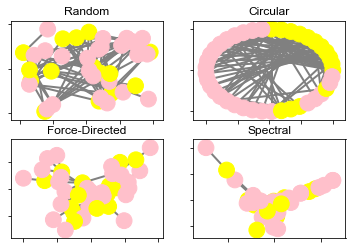

In [35]:
# Draw four layouts in four subplots
_, plot = plt.subplots(2, 2)

subplots = plot.reshape(1, 4)[0]
layouts = (nx.random_layout, nx.circular_layout, nx.spring_layout,
           nx.spectral_layout)
titles = ("Random", "Circular", "Force-Directed", "Spectral")
for plot, layout, title in zip(subplots, layouts, titles):
    pos = layout(G)
    nx.draw_networkx(G, pos=pos, ax=plot, with_labels=False, 
                     **dzcnapy.medium_attrs)
    plot.set_title(title)
    dzcnapy.set_extent(pos, plot)

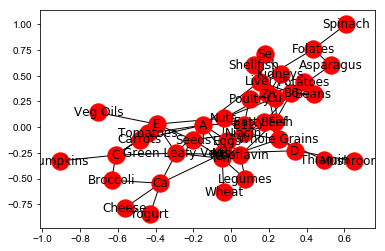

In [49]:
nx.draw_networkx(G)

In [40]:
help(dzcnapy.plot)

Help on function plot in module dzcnapy_plotlib:

plot(fname, save=False)



In [41]:
nx.write_graphml(G,'nutrients.graphml')

/Users/claudio/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Liberation Sans Narrow'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


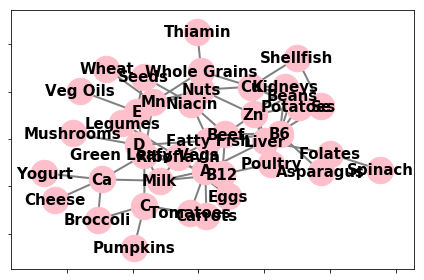

In [42]:
from networkx.drawing.nx_agraph import graphviz_layout

_, plot = plt.subplots()
pos = graphviz_layout(G)
nx.draw_networkx(G, pos, **dzcnapy.attrs)
dzcnapy.set_extent(pos, plot)
dzcnapy.plot("nutrients-graphviz")